In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [2]:
df  = pd.read_csv("./cardekho_dataset.csv",index_col=0)

In [3]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
df[['seller_type','selling_price']]

,seller_type,selling_price
0,Individual,120000
1,Individual,550000
2,Individual,215000
3,Individual,226000
4,Dealer,570000
...,...,...
19537,Dealer,250000
19540,Dealer,925000
19541,Dealer,425000
19542,Dealer,1225000


In [5]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

C:\Users\Jerry\AppData\Local\Temp\ipykernel_16032\295969650.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
C:\Users\Jerry\AppData\Local\Temp\ipykernel_16032\295969650.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
C:\Users\Jerry\AppData\Local\Temp\ipykernel_16032\295969650.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Jerry\AppData\Local\Temp\ipykernel_16032\295969650.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
C:\Use

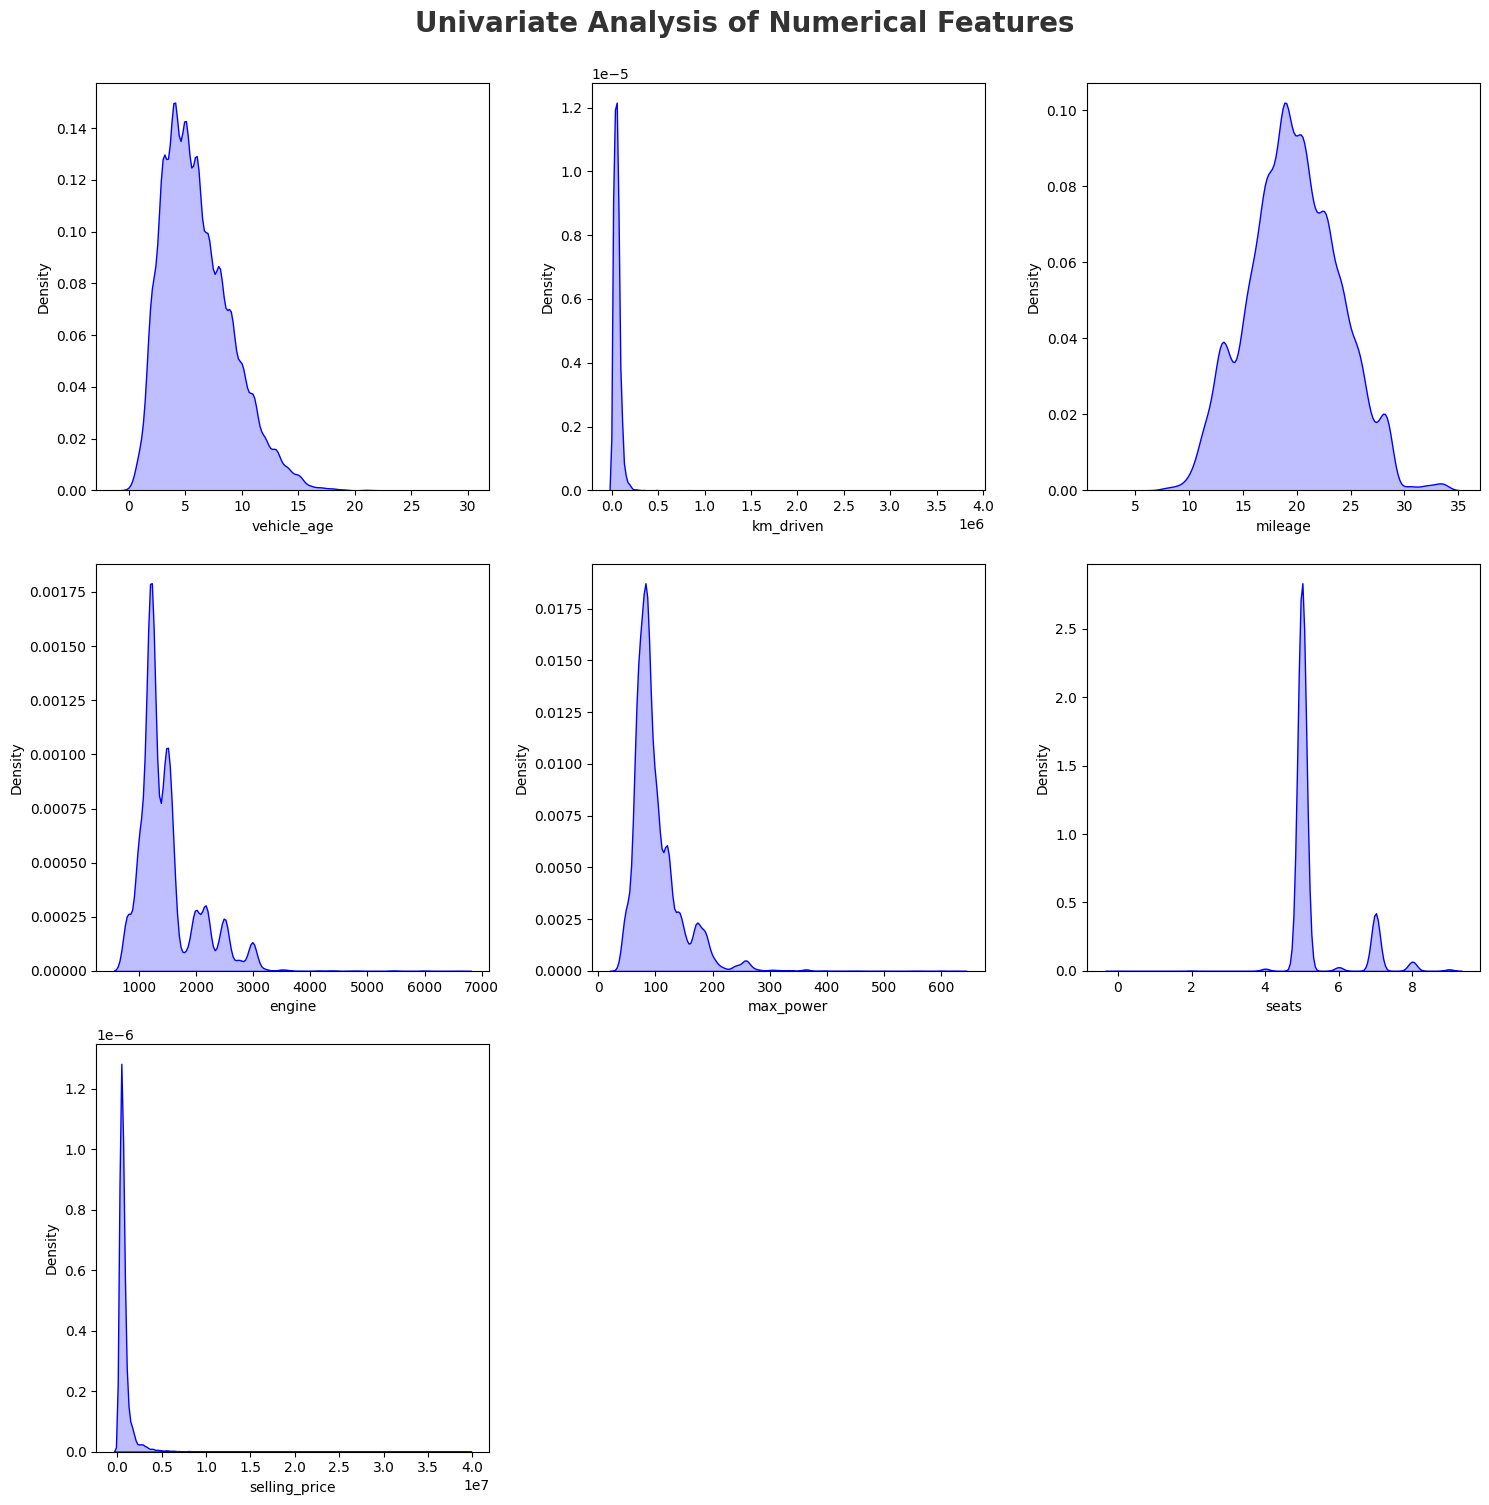

In [6]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    #to identify the density of each attribute

C:\Users\Jerry\AppData\Local\Temp\ipykernel_16032\3023448187.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Jerry\AppData\Local\Temp\ipykernel_16032\3023448187.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Jerry\AppData\Local\Temp\ipykernel_16032\3023448187.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Jerry\AppData\Local\Temp\ipykernel_16032\3023448187.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Jerry\AppData\Local\Temp\ipykernel_16032\3023448187.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Jerry\AppData\Local\Temp\ipykernel_16032\3023448187.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


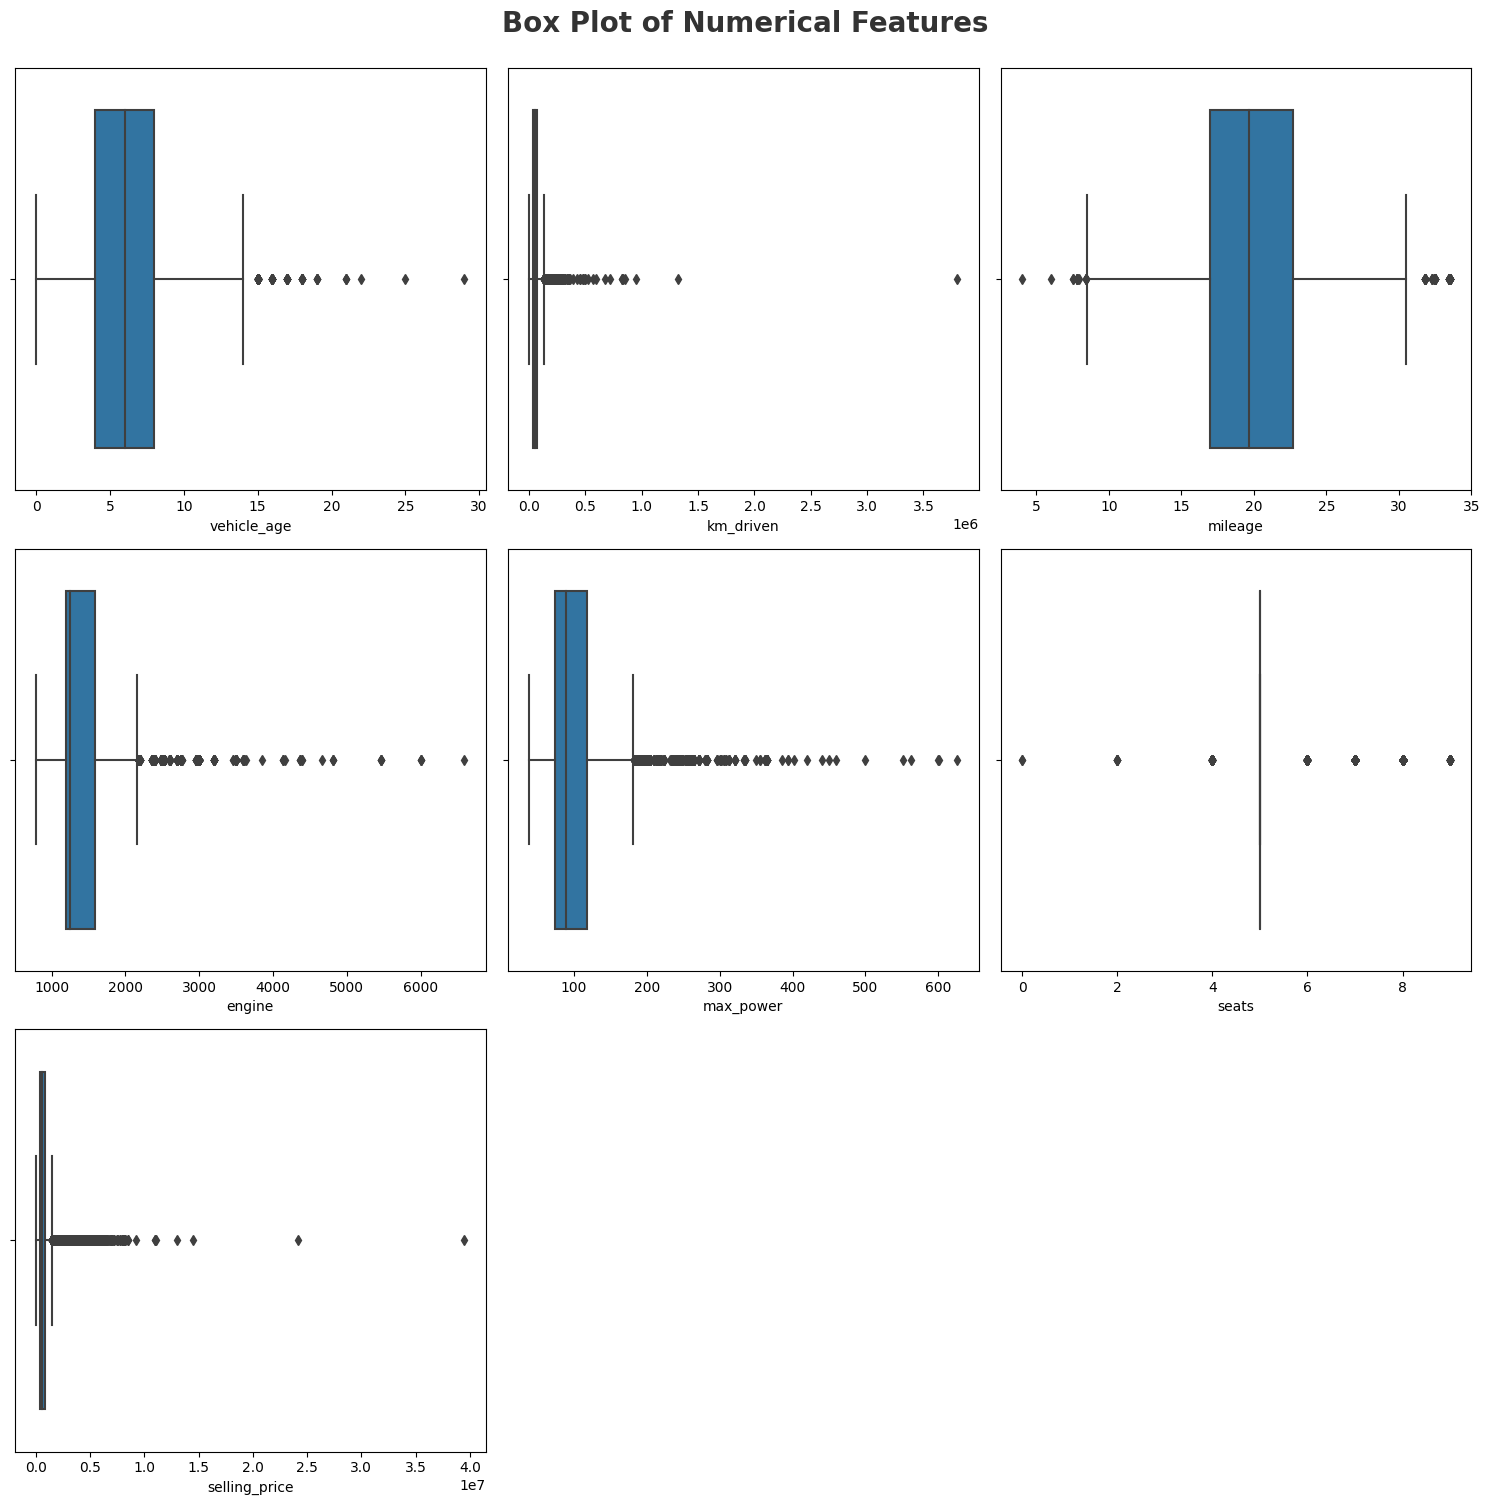

In [7]:
plt.figure(figsize=(15, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [8]:
#from this we identify that there is outliers in vehicle_age,km_driven,max_power,selling_price,engine
#need to rectify that

In [9]:
#outlier removal of vehicle_age

vehicle_sd = np.std(df["vehicle_age"])
df["zs_vehicle"] = (df.vehicle_age - df.vehicle_age.mean())/vehicle_sd
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,zs_vehicle
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,0.983562
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,-0.343933
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,1.647309
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,0.983562
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,-0.012060


In [10]:
df[(df.zs_vehicle > 3) |( df.zs_vehicle <-3)]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,zs_vehicle
319,Maruti Alto,Maruti,Alto,16,70000,Individual,Petrol,Manual,19.7,796,46.30,5,85000,3.306678
441,Maruti Alto,Maruti,Alto,16,5000,Individual,Petrol,Manual,19.7,796,46.30,5,95000,3.306678
477,Maruti Alto,Maruti,Alto,16,56700,Individual,Petrol,Manual,19.7,796,46.30,5,75000,3.306678
584,Maruti Wagon R,Maruti,Wagon R,16,33650,Individual,Petrol,Manual,18.9,998,67.10,5,110000,3.306678
680,Maruti Wagon R,Maruti,Wagon R,17,50000,Individual,Petrol,Manual,18.9,998,67.10,5,62000,3.638552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18768,Honda CR-V,Honda,CR-V,17,87000,Dealer,Petrol,Automatic,13.7,1997,153.86,5,450000,3.638552
18872,Mercedes-Benz E-Class,Mercedes-Benz,E-Class,17,126000,Dealer,Diesel,Automatic,11.0,2987,198.50,5,315000,3.638552
18888,Maruti Alto,Maruti,Alto,16,91000,Dealer,Petrol,Manual,19.7,796,46.30,5,125000,3.306678
19030,Maruti Wagon R,Maruti,Wagon R,16,50000,Individual,Petrol,Manual,18.9,998,67.10,5,75000,3.306678


In [11]:
df = df[(df.zs_vehicle < 3) &( df.zs_vehicle >-3)]
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,zs_vehicle
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,0.983562
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,-0.343933
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,1.647309
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,0.983562
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,-0.012060


In [12]:
#outlier removal of km_driven

In [13]:
#determining the z_score
km_sd = np.std(df["km_driven"])
df["zs_km"] = (df.km_driven - df.km_driven.mean())/km_sd
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,zs_vehicle,zs_km
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,0.983562,1.250062
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,-0.343933,-0.687390
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,1.647309,0.087591
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,0.983562,-0.358023
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,-0.012060,-0.493645


In [14]:
#finding the outiers
df[(df.zs_km > 3) |( df.zs_km <-3)]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,zs_vehicle,zs_km
199,Mahindra Bolero,Mahindra,Bolero,13,220000,Individual,Diesel,Manual,13.60,2523,63.0,7,260000,2.311057,3.187513
325,Volkswagen Polo,Volkswagen,Polo,11,350000,Individual,Petrol,Manual,16.47,1198,73.9,5,173000,1.647309,5.706200
432,Volkswagen Vento,Volkswagen,Vento,10,280000,Individual,Diesel,Manual,20.54,1598,103.6,5,300000,1.315436,4.349984
871,Toyota Innova,Toyota,Innova,8,387000,Individual,Diesel,Manual,12.99,2494,100.6,8,700000,0.651688,6.423057
1265,Toyota Innova,Toyota,Innova,8,215000,Individual,Diesel,Manual,12.99,2494,100.6,7,1000000,0.651688,3.090641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17549,Renault Duster,Renault,Duster,8,250000,Individual,Diesel,Manual,20.45,1461,83.8,5,550000,0.651688,3.768749
17569,Maruti Ciaz,Maruti,Ciaz,4,450003,Dealer,Petrol,Manual,20.73,1373,91.1,5,690000,-0.675807,7.643710
19380,Toyota Innova,Toyota,Innova,6,270000,Individual,Diesel,Manual,12.99,2494,100.6,7,1300000,-0.012060,4.156239
19435,Honda City,Honda,City,7,220000,Dealer,Diesel,Manual,26.00,1498,98.6,5,550000,0.319814,3.187513


In [15]:
df = df[(df.zs_km < 3) &( df.zs_km >-3)]
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,zs_vehicle,zs_km
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,0.983562,1.250062
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,-0.343933,-0.687390
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,1.647309,0.087591
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,0.983562,-0.358023
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,-0.012060,-0.493645


In [16]:
#outlier removal of selling price
sp_sd = np.std(df["selling_price"])
df["zs_sp"] = (df.selling_price - df.selling_price.mean())/sp_sd
df.head()


,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,zs_vehicle,zs_km,zs_sp
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,0.983562,1.250062,-0.734276
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,-0.343933,-0.687390,-0.254737
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,1.647309,0.087591,-0.628331
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,0.983562,-0.358023,-0.616064
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,-0.012060,-0.493645,-0.232432


In [17]:
df[(df.zs_sp >3) | (df.zs_sp <-3)]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,zs_vehicle,zs_km,zs_sp
367,Land Rover Rover,Land Rover,Rover,3,13000,Dealer,Petrol,Automatic,12.19,1997,237.36,4,7000000,-1.007681,-0.823011,6.938360
397,BMW Z4,BMW,Z4,1,2000,Dealer,Petrol,Automatic,11.29,2998,335.00,2,8250000,-1.671428,-1.036131,8.332370
405,Land Rover Rover,Land Rover,Rover,3,25000,Individual,Petrol,Automatic,9.17,2995,335.25,7,6200000,-1.007681,-0.590517,6.046193
416,BMW 6,BMW,6,3,30000,Individual,Petrol,Automatic,14.28,1998,254.70,4,5500000,-1.007681,-0.493645,5.265547
450,BMW X5,BMW,X5,2,19000,Individual,Diesel,Automatic,13.38,2993,265.00,5,7900000,-1.339555,-0.706764,7.942047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19261,Audi A6,Audi,A6,3,5333,Dealer,Petrol,Automatic,13.53,1984,177.01,5,4595000,-1.007681,-0.971556,4.256283
19338,Mercedes-Benz GLS,Mercedes-Benz,GLS,3,15000,Dealer,Diesel,Automatic,11.00,2987,258.00,7,8000000,-1.007681,-0.784262,8.053568
19384,BMW 5,BMW,5,2,4000,Dealer,Diesel,Automatic,18.12,1995,190.00,5,5295000,-1.339555,-0.997382,5.036929
19484,BMW 5,BMW,5,4,30000,Dealer,Diesel,Automatic,22.48,1995,187.74,5,3975000,-0.675807,-0.493645,3.564853


In [18]:
df = df[(df.zs_sp <3)&(df.zs_sp >-3)]
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,zs_vehicle,zs_km,zs_sp
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,0.983562,1.250062,-0.734276
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,-0.343933,-0.687390,-0.254737
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,1.647309,0.087591,-0.628331
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,0.983562,-0.358023,-0.616064
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,-0.012060,-0.493645,-0.232432


In [19]:
wg_sd = np.std(df["engine"])
df["zs_eg"] = (df.engine - df.engine.mean())/wg_sd
df = df[(df.zs_eg <3)&(df.zs_eg >-3)]
df.head()


,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,zs_vehicle,zs_km,zs_sp,zs_eg
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,0.983562,1.250062,-0.734276,-1.367216
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,-0.343933,-0.687390,-0.254737,-0.543779
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,1.647309,0.087591,-0.628331,-0.543779
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,0.983562,-0.358023,-0.616064,-0.952417
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,-0.012060,-0.493645,-0.232432,0.074312


In [20]:
mp_sd = np.std(df["engine"])
df["zs_mp"] = (df.max_power - df.max_power.mean())/mp_sd
df = df[(df.zs_mp <3)&(df.zs_mp >-3)]
df.head()


,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,zs_vehicle,zs_km,zs_sp,zs_eg,zs_mp
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,0.983562,1.250062,-0.734276,-1.367216,-0.114542
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,-0.343933,-0.687390,-0.254737,-0.543779,-0.031268
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,1.647309,0.087591,-0.628331,-0.543779,-0.035933
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,0.983562,-0.358023,-0.616064,-0.952417,-0.066024
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,-0.012060,-0.493645,-0.232432,0.074312,0.007430


C:\Users\Jerry\AppData\Local\Temp\ipykernel_16032\3023448187.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Jerry\AppData\Local\Temp\ipykernel_16032\3023448187.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Jerry\AppData\Local\Temp\ipykernel_16032\3023448187.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Jerry\AppData\Local\Temp\ipykernel_16032\3023448187.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Jerry\AppData\Local\Temp\ipykernel_16032\3023448187.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Jerry\AppData\Local\Temp\ipykernel_16032\3023448187.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


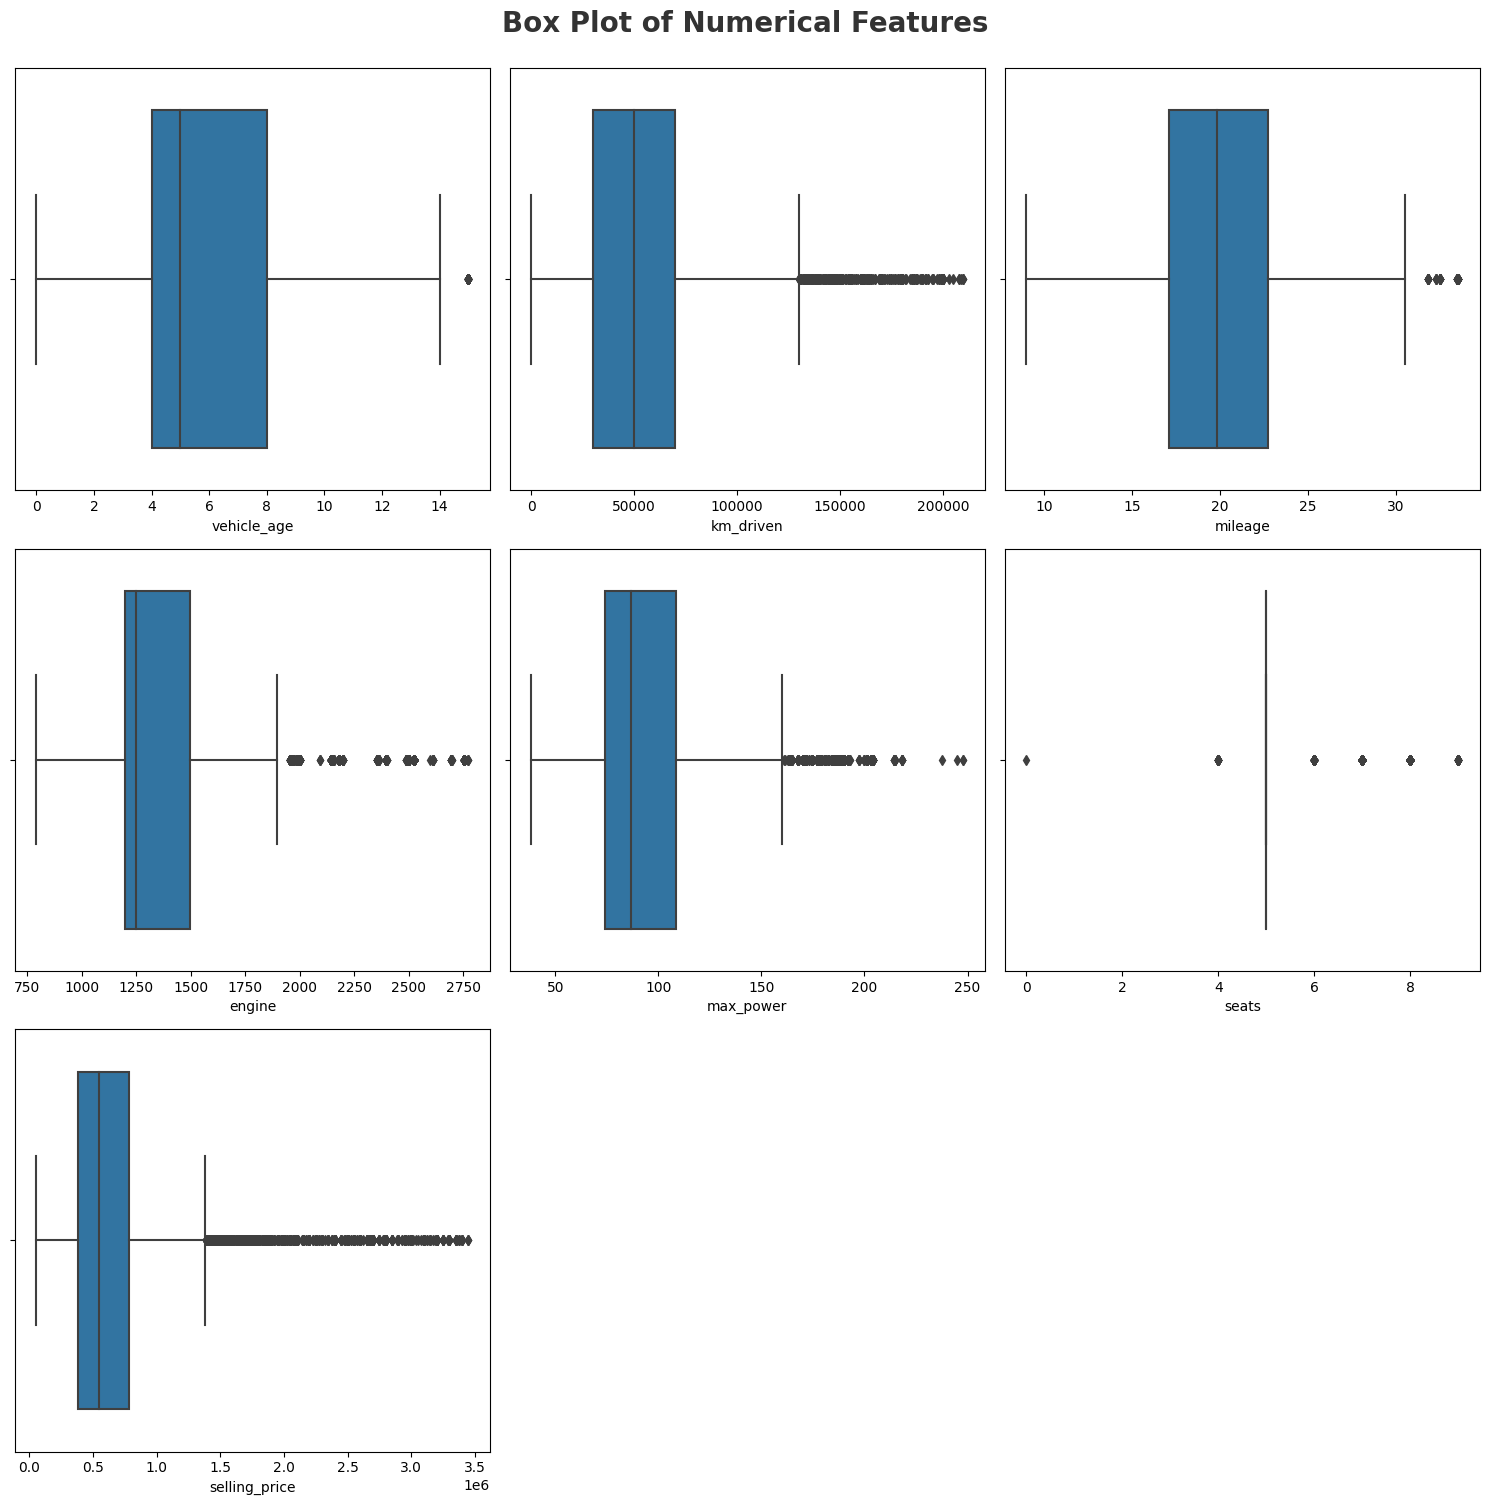

In [21]:
plt.figure(figsize=(15, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [22]:
#outlier have been optimized

In [23]:
df_copy = df.copy()

In [24]:
label_encoder = LabelEncoder()
df_copy['car_name'] = label_encoder.fit_transform(df_copy['car_name'])
df_copy = df_copy.drop(labels=['brand','model','zs_vehicle','zs_km','zs_sp','zs_eg','zs_mp'],axis=1)

In [25]:
df_copy.head()

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,49,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,25,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,31,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,49,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,11,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [26]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price,zs_vehicle,zs_km,zs_sp,zs_eg,zs_mp
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000,0.983562,1.250062,-0.734276,-1.367216,-0.114542
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000,-0.343933,-0.687390,-0.254737,-0.543779,-0.031268
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000,1.647309,0.087591,-0.628331,-0.543779,-0.035933
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000,0.983562,-0.358023,-0.616064,-0.952417,-0.066024
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000,-0.012060,-0.493645,-0.232432,0.074312,0.007430


In [27]:
df['car_name_encoded'] = label_encoder.fit_transform(df['car_name'])
car_name_mapping = dict(zip(df['car_name_encoded'], df['car_name']))
car_name_mapping

{49: 'Maruti Alto',
 25: 'Hyundai Grand',
 31: 'Hyundai i20',
 11: 'Ford Ecosport',
 63: 'Maruti Wagon R',
 30: 'Hyundai i10',
 28: 'Hyundai Venue',
 60: 'Maruti Swift',
 29: 'Hyundai Verna',
 72: 'Renault Duster',
 69: 'Mini Cooper',
 52: 'Maruti Ciaz',
 65: 'Mercedes-Benz C-Class',
 88: 'Toyota Innova',
 50: 'Maruti Baleno',
 61: 'Maruti Swift Dzire',
 91: 'Volkswagen Vento',
 23: 'Hyundai Creta',
 18: 'Honda City',
 41: 'Mahindra Bolero',
 73: 'Renault KWID',
 15: 'Honda Amaze',
 26: 'Hyundai Santro',
 48: 'Mahindra XUV500',
 43: 'Mahindra KUV100',
 58: 'Maruti Ignis',
 7: 'Datsun RediGO',
 45: 'Mahindra Scorpio',
 44: 'Mahindra Marazzo',
 10: 'Ford Aspire',
 13: 'Ford Figo',
 62: 'Maruti Vitara',
 83: 'Tata Tiago',
 90: 'Volkswagen Polo',
 37: 'Kia Seltos',
 51: 'Maruti Celerio',
 6: 'Datsun GO',
 17: 'Honda CR-V',
 42: 'Mahindra KUV',
 20: 'Honda Jazz',
 2: 'BMW 3',
 0: 'Audi A4',
 84: 'Tata Tigor',
 57: 'Maruti Ertiga',
 82: 'Tata Safari',
 86: 'Toyota Fortuner',
 46: 'Mahindra T

In [28]:
car_map = pd.DataFrame(list(car_name_mapping.items()), columns=['Encoded_Value', 'Original_Label'])
car_map.to_csv("label_encoding.csv",index=False)

In [29]:
df_copy = pd.get_dummies(df_copy,dtype=float)
df_copy.head()

,car_name,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,49,9,120000,19.70,796,46.30,5,120000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,25,5,20000,18.90,1197,82.00,5,550000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,31,11,60000,17.00,1197,80.00,5,215000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,49,9,37000,20.92,998,67.10,5,226000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,11,6,30000,22.77,1498,98.59,5,570000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [30]:
#now data preprocessing and feature engineering has been over now we head to training a model and check for the accuracy

In [31]:
X = df_copy.drop(labels = "selling_price",axis=1)
X.head()

,car_name,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,49,9,120000,19.70,796,46.30,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,25,5,20000,18.90,1197,82.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,31,11,60000,17.00,1197,80.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,49,9,37000,20.92,998,67.10,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,11,6,30000,22.77,1498,98.59,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [32]:
y = df_copy["selling_price"]
y.head()

0    120000
1    550000
2    215000
3    226000
4    570000
Name: selling_price, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))

C:\Users\Jerry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.458e+13, tolerance: 2.678e+11
  model = cd_fast.enet_coordinate_descent(


In [35]:
ML_model_df=pd.DataFrame({"Model":[ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', \
                                   'Random Forest Regressor', 'Ridge', 'Lasso'],
                         "Mean Squarred Error":mse,
                         "Root Mean Squarred Error":rmse,
                         "Explained Variance Score":evs,
                         "R-Sqaure Score(Accuracy)":r_square_score})

ML_model_df.set_index('Model',inplace=True)
ML_model_df

,Mean Squarred Error,Root Mean Squarred Error,Explained Variance Score,R-Sqaure Score(Accuracy)
Model,,,,
Linear Regression,5.860694e+10,242088.697524,0.722706,0.722701
Support Vector Rregression,2.241588e+11,473454.127656,0.000162,-0.060610
Decision Tree Regressor,2.634923e+10,162324.444034,0.875329,0.875328
Random Forest Regressor,1.788408e+10,133731.365654,0.915389,0.915381
Ridge,5.861812e+10,242111.793995,0.722653,0.722648
Lasso,5.860757e+10,242090.009119,0.722703,0.722698


In [ ]:
reg = RandomForestRegressor().fit(X_train,y_train)
pred  = reg.predict(X_test)

In [37]:
newdf = pd.DataFrame(pred,y_test)
newdf

,0
selling_price,
450000,3.928200e+05
550000,5.711620e+05
300000,3.054033e+05
1245000,1.151905e+06
455000,4.491500e+05
...,...
480000,5.886800e+05
1490000,1.274150e+06
400000,4.430982e+05


In [39]:
r2_score(y_true= y_test, y_pred= pred)

0.9136389244545582